### PitchAngleTest
MESSENGERでのPitch Angleについてのプロットを行うテスト

PDSの以下のデータを利用してテスト

先行研究と比較するために，2014-02-20 17:30 から 18:00のデータを見てみる

* **MESSENGER EPPS EPS Derived Daily Pitch Angle Spectrograms Data Collection**：時間分解能=2min，先行研究と違いそう...
* **MESSENGER EPPS FIPS Derived Energy-Resolved Pitch Angle Distributions Data Collection**：エネルギーに関しても見られる？
* **MESSENGER EPPS FIPS Derived Pitch Angle Distributions Data Collection**：先行研究のデータはこれ？

In [9]:
import MDUS
from MDUS import Analysis
import numpy as np

In [17]:
a = np.array([135.96572,396.39088,291.59437])
a_abs = np.linalg.norm(a)
print(a_abs)
print(np.linalg.norm(a/a_abs))
# 511.12288
# 509.

510.52882717628165
1.0


(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': '2011/04/13 04:19:21 - 2011/04/13 05:31:13'}, xlabel='UTC', ylabel='Magnetic Field [nT]'>)

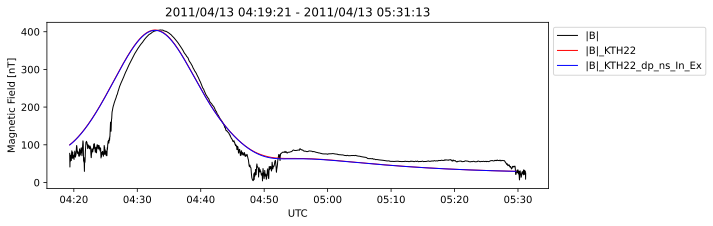

In [21]:
orbit = 2048
orbit = 52
data = MDUS.MagData()
data.Input(orbit=orbit)
data.CalcKTH22()
data.CalcKTH22(rc=False,rename=True)
# data.value
data.Plot(component={'|B|':'black','|B|_KTH22':'red','|B|_KTH22_dp_ns_In_Ex':'blue'})

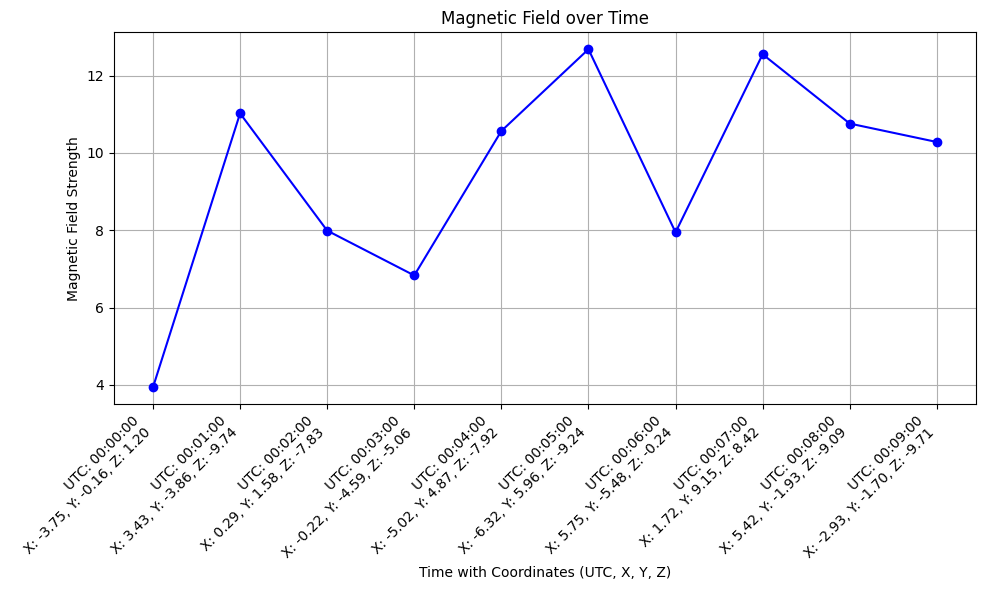

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータの作成 (前回のデータ)
n = 10  # データの数
timestamps = pd.date_range("2024-01-01", periods=n, freq="T")  # 時刻データ
x = np.random.uniform(-10, 10, size=n)  # x座標
y = np.random.uniform(-10, 10, size=n)  # y座標
z = np.random.uniform(-10, 10, size=n)  # z座標
magnetic_field = np.sqrt(x**2 + y**2 + z**2)  # 磁場 (x, y, zのベクトル和)

# DataFrameの作成
df = pd.DataFrame({
    'timestamp': timestamps,
    'x': x,
    'y': y,
    'z': z,
    'magnetic_field': magnetic_field
})

# X軸ラベルとして時刻、x, y, z座標を一緒に表示するためのラベル作成
labels = [
    f"UTC: {t.strftime('%H:%M:%S')}\nX: {x_val:.2f}, Y: {y_val:.2f}, Z: {z_val:.2f}"
    for t, x_val, y_val, z_val in zip(df['timestamp'], df['x'], df['y'], df['z'])
]

# 磁場データのプロット
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['magnetic_field'], marker='o', linestyle='-', color='b')

# X軸のラベルをカスタマイズ
plt.xticks(df['timestamp'], labels, rotation=45, ha='right')  # ラベルを45度回転して配置

# グラフの装飾
plt.title('Magnetic Field over Time')
plt.xlabel('Time with Coordinates (UTC, X, Y, Z)')
plt.ylabel('Magnetic Field Strength')
plt.grid(True)
plt.tight_layout()  # レイアウトを自動調整

# グラフの表示
plt.show()


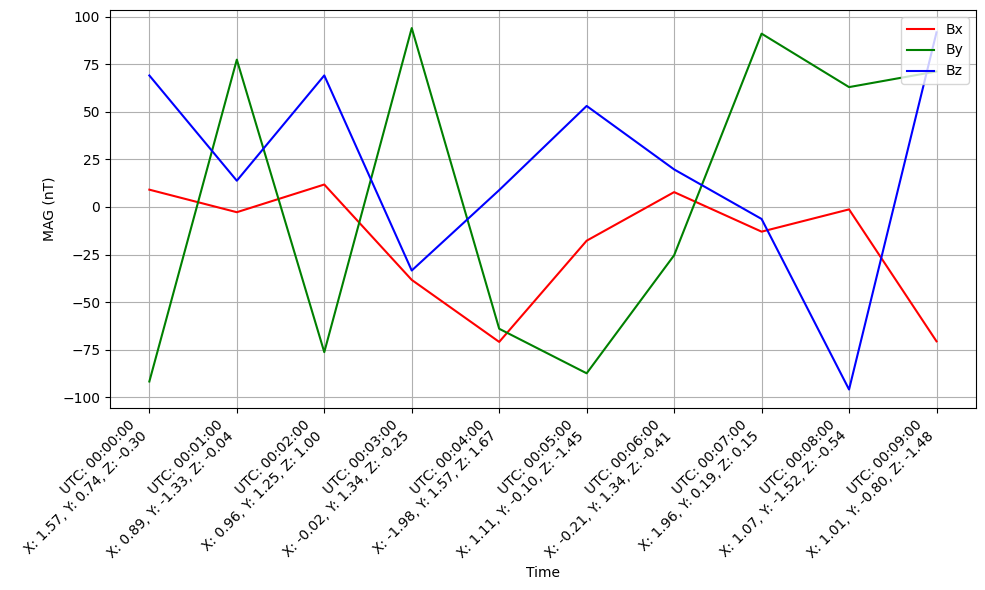

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ダミーデータの作成
n = 10
timestamps = pd.date_range("2024-01-01", periods=n, freq="T")
bx = np.random.uniform(-100, 100, size=n)
by = np.random.uniform(-100, 100, size=n)
bz = np.random.uniform(-100, 100, size=n)
x = np.random.uniform(-2, 2, size=n)
y = np.random.uniform(-2, 2, size=n)
z = np.random.uniform(-2, 2, size=n)

# DataFrame作成
df = pd.DataFrame({
    'timestamp': timestamps,
    'Bx': bx,
    'By': by,
    'Bz': bz,
    'X': x,
    'Y': y,
    'Z': z
})

# グラフ作成
fig, ax = plt.subplots(figsize=(10, 6))

# 磁場成分のプロット
ax.plot(df['timestamp'], df['Bx'], label='Bx', color='r')
ax.plot(df['timestamp'], df['By'], label='By', color='g')
ax.plot(df['timestamp'], df['Bz'], label='Bz', color='b')

# グラフの装飾
ax.set_ylabel('MAG (nT)')
ax.set_xlabel('Time')
ax.legend(loc='upper right')
plt.grid(True)

# 表形式のX軸ラベルを作成
labels = [
    f"UTC: {t.strftime('%H:%M:%S')}\nX: {x_val:.2f}, Y: {y_val:.2f}, Z: {z_val:.2f}"
    for t, x_val, y_val, z_val in zip(df['timestamp'], df['X'], df['Y'], df['Z'])
]
plt.xticks(df['timestamp'], labels, rotation=45, ha='right')

# レイアウト調整
plt.tight_layout()

# グラフ表示
plt.show()


In [1]:
import MDUS
import pandas as pd
import datetime
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
from matplotlib import dates as mdates
from matplotlib.colors import LogNorm

(<Figure size 900x300 with 2 Axes>,
 <Axes: title={'center': '2011/06/25 21:16:27 - 2011/06/25 22:45:29'}, xlabel='UTC', ylabel='Pitch Angle [deg]'>)

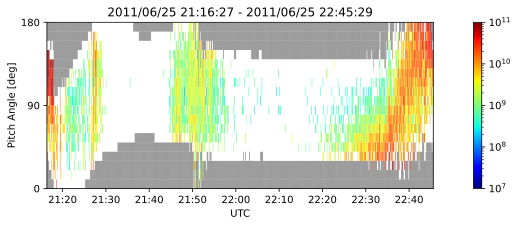

In [3]:
data = MDUS.PchangData()
data.Input(orbit=199)
data.Plot()

In [2]:
data_file = 'FIPS_PCHANG_2014051_DDR_V02.TAB'
data = pd.read_csv(data_file, skiprows=4,header=None,delim_whitespace=True)

In [3]:
met_start = datetime.datetime(2013,1,1) + datetime.timedelta(days=8,hours=6,minutes=19,seconds=50)
met_start -= datetime.timedelta(seconds=36389.809)
data_tmp = pd.DataFrame()

date_tmp = data[1].values
date_tmps = []
for i in date_tmp:
    date_tmps.append(met_start + datetime.timedelta(seconds=i))
# date_tmp = met_start + datetime.timedelta(seconds=date_tmp)

data_tmp['date'] = date_tmps
for i in range(18):
    data_tmp[i*10] = data[i+2].values
data_tmp = data_tmp.set_index('date')

In [19]:
datatmp

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
date,,,,,,,,,,,,,,,,,,
2014-02-20 17:32:31.191,NaN,NaN,NaN,2.197475e+10,2.230764e+10,1.733648e+10,3.320098e+10,2.114255e+10,1.812738e+10,1.579350e+10,6.385809e+09,4.563166e+09,5.453689e+09,4.354311e+09,0.000000e+00,6.022056e+09,4.132621e+09,1.142645e+10
2014-02-20 17:32:42.191,NaN,0.0,4.983158e+09,9.767434e+09,5.575975e+09,9.057696e+09,1.397691e+10,6.195152e+09,5.334442e+09,1.487942e+09,6.622640e+09,1.041456e+10,1.210283e+10,1.079235e+10,6.265630e+09,6.894891e+09,4.588434e+10,NaN
2014-02-20 17:32:53.191,NaN,NaN,NaN,4.856253e+10,0.000000e+00,9.912249e+09,1.013282e+10,2.044943e+09,5.014016e+09,0.000000e+00,2.560847e+09,0.000000e+00,4.488610e+09,2.245740e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2014-02-20 17:33:04.191,NaN,NaN,NaN,0.000000e+00,8.359501e+09,3.025182e+09,6.038596e+08,2.773624e+09,3.909960e+09,0.000000e+00,0.000000e+00,0.000000e+00,2.042114e+09,3.159017e+09,2.489525e+09,0.000000e+00,5.004500e+09,0.000000e+00
2014-02-20 17:33:14.191,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.450225e+09,0.000000e+00,8.816916e+08,0.000000e+00,0.000000e+00,1.066594e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-20 17:59:09.191,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
2014-02-20 17:59:20.191,NaN,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
2014-02-20 17:59:31.191,NaN,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN


2014-02-20 17:30:00
2014-02-20 18:00:00


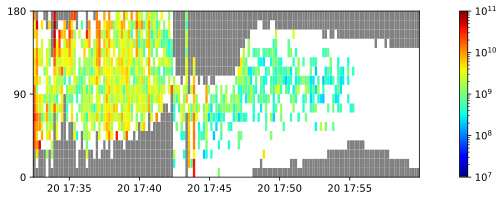

In [31]:
ds = pd.to_datetime('2014-02-20 17:30')
de = pd.to_datetime('2014-02-20 18:00')
print(ds)
print(de)
datatmp = data_tmp.query('@ds <= index <= @de')
datatmp = datatmp.where(datatmp >= 0, np.nan)
datatmp.replace(0, 1e-38,inplace=True)
angles = [5,15,25,35,45,55,65,75,85,95,105,115,125,135,145,155,165,175]
fig, ax = plt.subplots(figsize=(9,3))

cmap = plt.cm.jet  # カラーマップをjetに設定
cmap.set_bad(color='gray')  # NaN（欠損値）の色をグレーに設定
cmap.set_under(color='white')

ax.set_ylim(0,180)
ax.set_yticks([0,90,180])
hm = ax.pcolormesh(datatmp.index.values,angles,np.ma.masked_less_equal(datatmp.values.T,0),norm=LogNorm(),cmap=cmap)
hm.set_clim(1e7,1e11)
cbar = plt.colorbar(hm,pad=0.08)

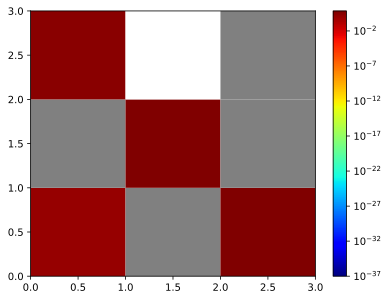

[[1.0 -- 7.0]
 [-- 5.0 --]
 [3.0 1e-38 --]]


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# サンプルデータ作成
data = {'A': [1, -2, 3],
        'B': [-1, 5, 1e-38],
        'C': [7, -8, np.nan]}

df = pd.DataFrame(data)

# 負の値をnp.nanに置き換える
df = df.where(df >= 0, np.nan)

# DataFrameをnumpy配列に変換
data_array = df.to_numpy()

# カラーマップの設定（NaNはグレー、1e-38は白）
cmap = plt.cm.jet
cmap.set_bad(color='gray')  # NaN（欠損値）はグレー
cmap.set_under(color='white')  # 1e-38は白

# FigureとAxesオブジェクトを作成
fig, ax = plt.subplots()

# 1e-38を特定して、その部分はマスクしないが白で表示するための調整
# まず、1e-38以下の値をマスクし、後で白に表示するように調整
masked_data = np.ma.masked_where(np.isnan(data_array), data_array)

# pcolormeshでプロット (LogNormを使ってlogスケール表示、vminを1e-38より少し大きい値に設定)
c = ax.pcolormesh(masked_data, cmap=cmap, norm=mcolors.LogNorm(vmin=1e-37, vmax=np.nanmax(data_array)))

# カラーバーの追加
fig.colorbar(c, ax=ax)

# 描画表示
plt.show()

print(masked_data)

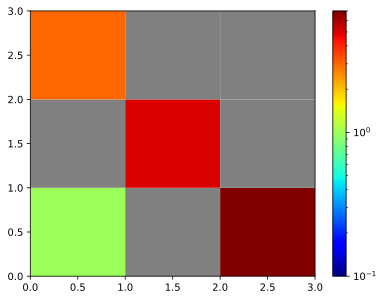

[[1.0 nan 7.0]
 [nan 5.0 nan]
 [3.0 nan --]]


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# サンプルデータ作成
data = {'A': [1, -2, 3],
        'B': [-1, 5, -6],
        'C': [7, -8, 0]}

df = pd.DataFrame(data)

# 負の値をnp.nanに置き換える (0はそのまま残す)
df = df.where(df >= 0, np.nan)

# DataFrameをnumpy配列に変換
data_array = df.to_numpy()

# カラーマップの設定 (NaNはグレー、0は白)
cmap = plt.cm.jet
cmap.set_bad(color='gray')  # NaN（欠損値）はグレー
cmap.set_under(color='white')  # 0は白

# FigureとAxesオブジェクトを作成
fig, ax = plt.subplots()

# masked_arrayを作成して0以下の値をマスク
masked_data = np.ma.masked_less_equal(data_array, 0)

# pcolormeshでプロット (LogNormを使ってlogスケール表示)
c = ax.pcolormesh(masked_data, cmap=cmap, norm=mcolors.LogNorm(vmin=0.1, vmax=np.nanmax(data_array)))

# カラーバーの追加
fig.colorbar(c, ax=ax)

# 描画表示
plt.show()

print(masked_data)

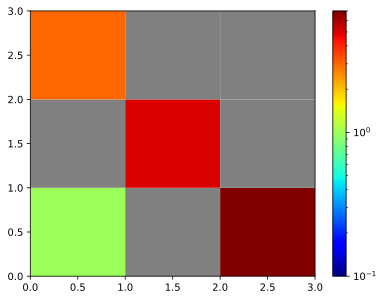

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# サンプルデータ作成
data = {'A': [1, -2, 3],
        'B': [-1, 5, -6],
        'C': [7, -8, 0]}

df = pd.DataFrame(data)

# 負の値をnp.nanに置き換える (0はそのまま残す)
df = df.where(df >= 0, np.nan)

# DataFrameをnumpy配列に変換
data_array = df.to_numpy()

# カラーマップの設定 (NaNはグレー、0は白)
cmap = plt.cm.jet
cmap.set_bad(color='gray')  # NaN（欠損値）はグレー
cmap.set_under(color='white')  # 0は白

# FigureとAxesオブジェクトを作成
fig, ax = plt.subplots()

# NaNのみをマスクする (0は残す)
masked_data = np.ma.masked_invalid(data_array)

# pcolormeshでプロット (LogNormを使ってlogスケール表示、vminを小さな正の数に設定)
c = ax.pcolormesh(masked_data, cmap=cmap, norm=mcolors.LogNorm(vmin=0.1, vmax=np.nanmax(data_array)))

# カラーバーの追加
fig.colorbar(c, ax=ax)

# 描画表示
plt.show()


In [12]:
data
# 0 : Index
# 1 : MET
#  

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,570,35184474.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,571,35184485.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,572,35184496.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,573,35184506.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,574,35184517.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,7047,35254855.0,-1.0,0.0,0.0,689977990.0,1.055461e+09,1.074392e+09,1.341771e+09,8.947171e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
3833,7048,35254866.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,1.494368e+09,1.212914e+09,...,0.0,0.0,819941440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3834,7049,35254877.0,-1.0,-1.0,-1.0,0.0,2.030397e+09,4.841573e+08,3.856334e+08,1.286823e+09,...,471873730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0
3835,7050,35254887.0,-1.0,-1.0,-1.0,0.0,9.512102e+08,1.449982e+09,7.941700e+08,2.941032e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
